# Lab 9 :  employee hopping preiction using random forest

## Joshua E (225229117)

### Step 1: Understand data

In [194]:
import pandas as pd

In [195]:
df=pd.read_csv('emp_hop.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [196]:
df.shape

(1470, 35)

In [197]:
df.size

51450

In [198]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [199]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [200]:
df.Age.value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

### Step 2 :Extract X and y

In [201]:
X = df.drop(['Attrition'],axis=1)
y = df.Attrition

In [202]:
X.shape

(1470, 34)

In [203]:
y.shape

(1470,)

In [204]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [205]:
y = y.apply(lambda x:1 if x == 'Yes' else 0)
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

### Step 3 : Feature Extraction

In [206]:
df = pd.get_dummies(df,columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [207]:
X = df.drop(['Attrition'],axis=1)

### Step 4 : check X and Y shape

In [208]:
X.shape

(1470, 55)

In [209]:
y.shape

(1470,)

### Step 5 : Model Development

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [211]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, max_features=0.3) 
#This is the number of trees you want to build before taking the maximum voting or averages of predictions.
#0.3 : This option allows the random forest to take 30% of variables in individual run

In [212]:
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

In [213]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Step 6 : Testing

In [214]:
from sklearn.metrics import accuracy_score,classification_report

In [215]:
RFC_acc = accuracy_score(y_test,y_pred)
RFC_acc

0.8639455782312925

In [216]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       255
          1       0.45      0.13      0.20        39

avg / total       0.82      0.86      0.83       294



### Step 7 : Feature Importance Value

In [217]:
print(RFC.feature_importances_)

[0.05158335 0.05038371 0.03994741 0.01666482 0.         0.04493192
 0.0217106  0.04007157 0.01881083 0.02352508 0.02384399 0.09281971
 0.04201946 0.0301714  0.02446653 0.0028655  0.01770826 0.
 0.02864912 0.04898402 0.02246059 0.02002214 0.03841892 0.0245438
 0.02513163 0.02518813 0.00262506 0.01520039 0.00514882 0.00161977
 0.00735449 0.00730223 0.00169986 0.00436218 0.00510076 0.00506175
 0.00279511 0.00614177 0.00567837 0.00393542 0.00191507 0.00164387
 0.00734987 0.00090884 0.00193658 0.00070754 0.0048657  0.00812045
 0.00867539 0.00425863 0.00595128 0.01963582 0.         0.03623636
 0.04884613]


In [219]:
feature_name = pd.DataFrame(RFC.feature_importances_, index=X_train.columns, columns=['Impotant_Feature'])
feature_name

,Impotant_Feature
Age,0.051583
DailyRate,0.050384
DistanceFromHome,0.039947
Education,0.016665
EmployeeCount,0.000000
EmployeeNumber,0.044932
EnvironmentSatisfaction,0.021711
HourlyRate,0.040072
JobInvolvement,0.018811
JobLevel,0.023525


In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

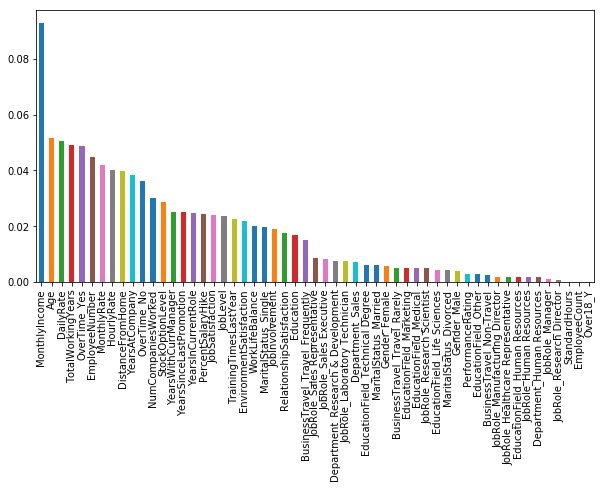

In [228]:
pd.Series(RFC.feature_importances_, index=X_train.columns).sort_values(ascending=False).plot(kind='bar')

### Step 8 :  Visualize RF Decision Tree using grapviz

In [252]:
estimator = RFC.estimators_[5]

In [270]:
from sklearn import tree
from sklearn.tree import export_graphviz
with open("RFDT.dot", 'w') as f:
    f = tree.export_graphviz(estimator, out_file=f, max_depth=4, impurity=False, feature_names=X.columns.values,class_names=['Yes','No'],filled=True)

In [271]:
!dot - Tpng RFDT.dot -o RFDT.png


'dot' is not recognized as an internal or external command,
operable program or batch file.


### Step 9 : RF with a range of trees

In [259]:
rf2 = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    rf2.set_params(n_estimators=n_trees)
    rf2.fit(X_train, y_train)
    oob_error = 1 - rf2.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

,oob
n_trees,
15.0,0.163265
20.0,0.159014
30.0,0.148810
40.0,0.144558
50.0,0.139456
100.0,0.140306
150.0,0.138605
200.0,0.140306
300.0,0.137755


### Step 10  : plot oob-error for each tree

[Text(0,0.5,'out-of-bag error')]

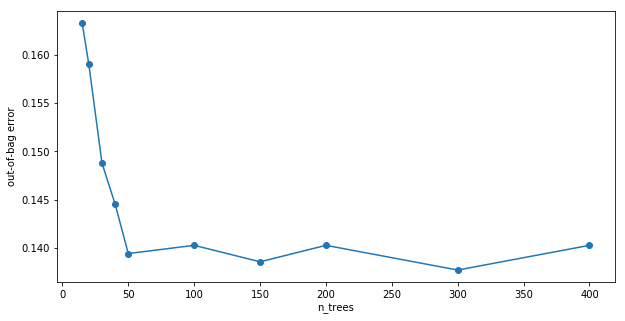

In [260]:
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(10,5))
ax.set(ylabel='out-of-bag error')

### Step 11  : compare with decision classifier

In [264]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [265]:
y_pred1 = clf.predict(X_test)
y_pred1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [267]:
from sklearn import tree
from sklearn.tree import export_graphviz
with open("DTC2.dot", 'w') as f:
    f = tree.export_graphviz(clf,out_file=f,max_depth = 4,impurity = False,feature_names =X.columns.values,class_names=['Yes','No'],filled=True)

In [268]:
!dot -Tpng DTC2.dot -o DTC2.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [274]:
print("Accuracy of test :",clf.score(X_test,y_test))

Accuracy of test : 0.9183673469387755


In [278]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       255
          1       0.45      0.13      0.20        39

avg / total       0.82      0.86      0.83       294



In [281]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score  

In [282]:
print("RF model :",accuracy_score(y_test,y_pred))
print("RF Precision:",precision_score(y_test,y_pred))
print("RF Recall :",recall_score(y_test,y_pred))
print("RF F1 score :",f1_score(y_test,y_pred))
print("\n")
print("DT model :",accuracy_score(y_test,y_pred1))
print("DT Precision:",precision_score(y_test,y_pred1))
print("DT Recall :",recall_score(y_test,y_pred1))
print("DT F1 score :",f1_score(y_test,y_pred1))

RF model : 0.8639455782312925
RF Precision: 0.45454545454545453
RF Recall : 0.1282051282051282
RF F1 score : 0.19999999999999996


DT model : 0.9183673469387755
DT Precision: 1.0
DT Recall : 0.38461538461538464
DT F1 score : 0.5555555555555556
